## Importação das Bibliotecas

In [17]:
import cv2
import numpy as np
import os
import zipfile
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

## Base de Dados

In [18]:
path = './datasets/cropped_faces/'
paths = [os.path.join(path, f) for f in os.listdir(path)]

In [19]:
paths

['./datasets/cropped_faces/s01_01.jpg',
 './datasets/cropped_faces/s01_02.jpg',
 './datasets/cropped_faces/s01_03.jpg',
 './datasets/cropped_faces/s01_04.jpg',
 './datasets/cropped_faces/s01_05.jpg',
 './datasets/cropped_faces/s01_06.jpg',
 './datasets/cropped_faces/s01_07.jpg',
 './datasets/cropped_faces/s01_08.jpg',
 './datasets/cropped_faces/s01_09.jpg',
 './datasets/cropped_faces/s01_10.jpg',
 './datasets/cropped_faces/s01_11.jpg',
 './datasets/cropped_faces/s01_12.jpg',
 './datasets/cropped_faces/s01_13.jpg',
 './datasets/cropped_faces/s01_14.jpg',
 './datasets/cropped_faces/s01_15.jpg',
 './datasets/cropped_faces/s02_01.jpg',
 './datasets/cropped_faces/s02_02.jpg',
 './datasets/cropped_faces/s02_03.jpg',
 './datasets/cropped_faces/s02_04.jpg',
 './datasets/cropped_faces/s02_05.jpg',
 './datasets/cropped_faces/s02_06.jpg',
 './datasets/cropped_faces/s02_07.jpg',
 './datasets/cropped_faces/s02_08.jpg',
 './datasets/cropped_faces/s02_09.jpg',
 './datasets/cropped_faces/s02_10.jpg',



## Divisão em Treino em Teste

In [20]:
def base_treino_teste(paths):
    
    imagens_treino, ids_treino = [],[]
    imagens_teste, ids_teste = [],[]
    
    paths = [os.path.join(path, f) for f in os.listdir(path)]
    
    for img_path in paths:
        imagem = cv2.imread(img_path)
        imagem = cv2.resize(imagem, (200,200))
        imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)

        imagens_nome = int(os.path.basename(img_path).split('.')[0][-2:])
        ids_nome = int(os.path.basename(img_path).split('.')[0].split('_')[0][-2:])
        if imagens_nome <= 10:
            imagens_treino.append(imagem)
            ids_treino.append(ids_nome)
        else:
            imagens_teste.append(imagem)
            ids_teste.append(ids_nome)
            
    return np.asarray(imagens_treino), np.asarray(ids_treino), np.asarray(imagens_teste), np.asarray(ids_teste)

In [21]:
imagens_treino, ids_treino, imagens_teste, ids_teste = base_treino_teste(path)

In [22]:
imagens_treino.shape, imagens_teste.shape

((500, 200, 200), (250, 200, 200))

In [23]:
ids_treino

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9,
        9,  9,  9,  9,  9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11,
       11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14,
       14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16,
       16, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17,
       18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 19, 19,
       19, 19, 19, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 21, 21, 21, 21,
       21, 21, 21, 21, 21, 21, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 23,
       23, 23, 23, 23, 23

In [24]:
ids_teste

array([ 1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  4,  4,
        4,  4,  4,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  7,  7,  7,  7,
        7,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9, 10, 10, 10, 10, 10, 11,
       11, 11, 11, 11, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 14, 14, 14,
       14, 14, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17,
       18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20, 21, 21,
       21, 21, 21, 22, 22, 22, 22, 22, 23, 23, 23, 23, 23, 24, 24, 24, 24,
       24, 25, 25, 25, 25, 25, 26, 26, 26, 26, 26, 27, 27, 27, 27, 27, 28,
       28, 28, 28, 28, 29, 29, 29, 29, 29, 30, 30, 30, 30, 30, 31, 31, 31,
       31, 31, 32, 32, 32, 32, 32, 33, 33, 33, 33, 33, 34, 34, 34, 34, 34,
       35, 35, 35, 35, 35, 36, 36, 36, 36, 36, 37, 37, 37, 37, 37, 38, 38,
       38, 38, 38, 39, 39, 39, 39, 39, 40, 40, 40, 40, 40, 41, 41, 41, 41,
       41, 42, 42, 42, 42, 42, 43, 43, 43, 43, 43, 44, 44, 44, 44, 44, 45,
       45, 45, 45, 45, 46

## Modelo EigenFaces

In [25]:
model_eigen = cv2.face.EigenFaceRecognizer_create()
model_eigen.train(imagens_treino, ids_treino)

### Previsão um modelo

In [31]:
previsao= model_eigen.predict(imagens_teste[1])
previsao

(1, 4451.10405648532)

### Previsão da base de dados de Teste

In [27]:
previsoes = []
for i in imagens_teste:
    previsoes.append(model_eigen.predict(i)[0])


In [28]:
print(previsoes)

[35, 1, 1, 1, 4, 32, 32, 2, 2, 2, 3, 27, 3, 3, 3, 4, 4, 4, 4, 4, 16, 5, 4, 5, 5, 6, 6, 6, 6, 6, 7, 7, 1, 7, 7, 8, 8, 8, 8, 1, 9, 33, 33, 27, 9, 38, 10, 10, 6, 10, 22, 22, 2, 11, 11, 12, 12, 12, 12, 12, 1, 13, 32, 33, 13, 14, 50, 1, 3, 1, 15, 15, 15, 15, 15, 16, 16, 4, 16, 27, 17, 17, 17, 17, 17, 27, 4, 27, 18, 27, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20, 10, 21, 21, 21, 21, 22, 22, 22, 22, 22, 41, 6, 29, 23, 4, 24, 24, 24, 24, 24, 25, 25, 25, 25, 25, 26, 26, 26, 26, 26, 27, 27, 27, 27, 27, 28, 28, 28, 28, 28, 44, 16, 40, 29, 29, 30, 30, 30, 30, 30, 31, 18, 31, 31, 31, 32, 32, 4, 32, 32, 33, 33, 33, 33, 33, 35, 1, 34, 34, 35, 35, 35, 35, 35, 35, 36, 36, 36, 8, 36, 49, 37, 37, 37, 37, 38, 38, 38, 38, 38, 32, 32, 39, 39, 39, 40, 4, 1, 4, 40, 41, 33, 33, 22, 22, 42, 42, 42, 42, 26, 43, 22, 43, 25, 43, 4, 32, 4, 4, 16, 45, 45, 45, 45, 45, 46, 46, 46, 27, 1, 47, 47, 47, 47, 47, 6, 48, 48, 48, 48, 49, 49, 49, 49, 49, 50, 50, 50, 50, 50]


In [29]:
ids_teste

array([ 1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  4,  4,
        4,  4,  4,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  7,  7,  7,  7,
        7,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9, 10, 10, 10, 10, 10, 11,
       11, 11, 11, 11, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 14, 14, 14,
       14, 14, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17,
       18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20, 21, 21,
       21, 21, 21, 22, 22, 22, 22, 22, 23, 23, 23, 23, 23, 24, 24, 24, 24,
       24, 25, 25, 25, 25, 25, 26, 26, 26, 26, 26, 27, 27, 27, 27, 27, 28,
       28, 28, 28, 28, 29, 29, 29, 29, 29, 30, 30, 30, 30, 30, 31, 31, 31,
       31, 31, 32, 32, 32, 32, 32, 33, 33, 33, 33, 33, 34, 34, 34, 34, 34,
       35, 35, 35, 35, 35, 36, 36, 36, 36, 36, 37, 37, 37, 37, 37, 38, 38,
       38, 38, 38, 39, 39, 39, 39, 39, 40, 40, 40, 40, 40, 41, 41, 41, 41,
       41, 42, 42, 42, 42, 42, 43, 43, 43, 43, 43, 44, 44, 44, 44, 44, 45,
       45, 45, 45, 45, 46

### Avaliação do Modelo

In [30]:
accuracy_score(ids_teste, previsoes)

0.74

### Salvando o modelo

In [16]:
# model_eigen.write('./modelos/model_eigen.yml')

## Modelo FisherFace

In [117]:
model_fisher = cv2.face.FisherFaceRecognizer_create(num_components=100)
model_fisher.train(imagens_treino, ids_treino)

In [118]:
# model_fisher.write('./modelos/model_fisher.yml')

### Previsão da base de dados de Teste

In [119]:
previsoes_fisher = []
for i in imagens_teste:
    previsoes_fisher.append(model_fisher.predict(i)[0])


In [120]:
print(previsoes_fisher)

[32, 1, 20, 1, 25, 20, 32, 2, 2, 2, 3, 3, 3, 3, 3, 32, 4, 4, 4, 4, 14, 5, 32, 5, 5, 6, 32, 32, 6, 6, 25, 32, 32, 32, 7, 8, 32, 8, 8, 13, 32, 9, 33, 32, 9, 32, 32, 32, 35, 43, 16, 22, 15, 25, 32, 25, 32, 12, 25, 32, 1, 13, 32, 20, 13, 32, 9, 32, 32, 32, 15, 15, 15, 15, 15, 32, 16, 16, 16, 32, 17, 17, 17, 17, 17, 22, 4, 25, 32, 32, 35, 19, 19, 19, 35, 20, 20, 20, 20, 20, 30, 21, 21, 21, 21, 22, 22, 22, 22, 22, 31, 31, 32, 23, 50, 24, 24, 24, 2, 24, 20, 25, 25, 25, 25, 26, 26, 25, 26, 26, 16, 27, 25, 25, 27, 28, 28, 28, 28, 28, 9, 32, 32, 23, 29, 30, 30, 30, 30, 30, 31, 31, 31, 31, 31, 32, 32, 32, 32, 32, 16, 33, 33, 16, 32, 32, 20, 34, 34, 8, 35, 32, 32, 33, 35, 36, 20, 36, 16, 36, 20, 20, 18, 25, 32, 38, 38, 38, 32, 38, 32, 32, 20, 32, 32, 40, 40, 32, 40, 40, 25, 40, 33, 33, 12, 32, 42, 42, 42, 44, 20, 25, 43, 32, 43, 32, 32, 16, 16, 25, 33, 45, 45, 16, 45, 46, 25, 25, 2, 20, 47, 47, 47, 2, 47, 32, 48, 45, 48, 48, 49, 49, 32, 49, 49, 50, 50, 2, 50, 50]


In [121]:
ids_teste

array([ 1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  4,  4,
        4,  4,  4,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  7,  7,  7,  7,
        7,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9, 10, 10, 10, 10, 10, 11,
       11, 11, 11, 11, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 14, 14, 14,
       14, 14, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17,
       18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20, 21, 21,
       21, 21, 21, 22, 22, 22, 22, 22, 23, 23, 23, 23, 23, 24, 24, 24, 24,
       24, 25, 25, 25, 25, 25, 26, 26, 26, 26, 26, 27, 27, 27, 27, 27, 28,
       28, 28, 28, 28, 29, 29, 29, 29, 29, 30, 30, 30, 30, 30, 31, 31, 31,
       31, 31, 32, 32, 32, 32, 32, 33, 33, 33, 33, 33, 34, 34, 34, 34, 34,
       35, 35, 35, 35, 35, 36, 36, 36, 36, 36, 37, 37, 37, 37, 37, 38, 38,
       38, 38, 38, 39, 39, 39, 39, 39, 40, 40, 40, 40, 40, 41, 41, 41, 41,
       41, 42, 42, 42, 42, 42, 43, 43, 43, 43, 43, 44, 44, 44, 44, 44, 45,
       45, 45, 45, 45, 46

In [122]:
accuracy_score(ids_teste, previsoes_fisher)

0.544

## Modelo LBPH

In [84]:
model_lbph = cv2.face.LBPHFaceRecognizer_create(radius=1, neighbors=5, grid_x=8, grid_y=8)
model_lbph.train(imagens_treino, ids_treino)

In [85]:
previsoes_lbph = []
for i in imagens_teste:
    previsoes_lbph.append(model_lbph.predict(i)[0])


In [86]:
print(previsoes_lbph)

[8, 1, 1, 1, 46, 1, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 29, 5, 5, 5, 5, 6, 6, 6, 6, 6, 15, 7, 7, 7, 7, 8, 8, 8, 8, 8, 9, 9, 1, 9, 9, 10, 10, 38, 10, 10, 11, 2, 11, 11, 11, 12, 12, 12, 40, 12, 35, 13, 46, 33, 13, 14, 8, 44, 2, 14, 15, 15, 15, 15, 15, 16, 16, 48, 27, 18, 17, 29, 17, 17, 17, 22, 48, 27, 44, 9, 19, 19, 19, 19, 19, 20, 22, 20, 20, 20, 10, 21, 21, 21, 21, 22, 1, 22, 22, 22, 23, 4, 29, 23, 23, 24, 37, 24, 24, 24, 25, 25, 25, 25, 25, 26, 26, 31, 26, 26, 27, 27, 27, 27, 27, 28, 28, 28, 28, 28, 41, 16, 29, 29, 29, 30, 30, 30, 30, 30, 31, 39, 31, 31, 31, 32, 32, 4, 1, 32, 33, 33, 33, 33, 33, 34, 34, 34, 34, 14, 35, 16, 34, 35, 35, 36, 36, 36, 36, 36, 49, 37, 41, 37, 37, 38, 38, 38, 38, 38, 39, 39, 39, 16, 16, 40, 40, 40, 29, 40, 41, 31, 33, 45, 29, 42, 42, 42, 42, 42, 43, 45, 43, 43, 43, 31, 44, 44, 44, 44, 45, 45, 45, 45, 45, 46, 46, 46, 46, 48, 47, 47, 47, 47, 47, 48, 48, 48, 48, 48, 49, 49, 49, 49, 49, 50, 50, 50, 50, 50]


In [87]:
ids_teste

array([ 1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  4,  4,
        4,  4,  4,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  7,  7,  7,  7,
        7,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9, 10, 10, 10, 10, 10, 11,
       11, 11, 11, 11, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 14, 14, 14,
       14, 14, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17,
       18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20, 21, 21,
       21, 21, 21, 22, 22, 22, 22, 22, 23, 23, 23, 23, 23, 24, 24, 24, 24,
       24, 25, 25, 25, 25, 25, 26, 26, 26, 26, 26, 27, 27, 27, 27, 27, 28,
       28, 28, 28, 28, 29, 29, 29, 29, 29, 30, 30, 30, 30, 30, 31, 31, 31,
       31, 31, 32, 32, 32, 32, 32, 33, 33, 33, 33, 33, 34, 34, 34, 34, 34,
       35, 35, 35, 35, 35, 36, 36, 36, 36, 36, 37, 37, 37, 37, 37, 38, 38,
       38, 38, 38, 39, 39, 39, 39, 39, 40, 40, 40, 40, 40, 41, 41, 41, 41,
       41, 42, 42, 42, 42, 42, 43, 43, 43, 43, 43, 44, 44, 44, 44, 44, 45,
       45, 45, 45, 45, 46

In [88]:
accuracy_score(ids_teste, previsoes_lbph)

0.796

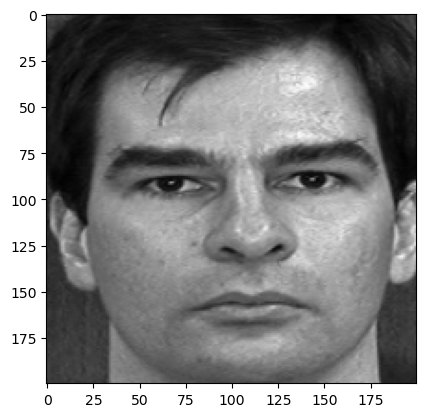

In [90]:
plt.imshow(imagens_treino[0], cmap='gray')

In [123]:
import zipfile

In [124]:
import zipfile
import os

def zip_folder(folder_path, output_path):
    with zipfile.ZipFile(output_path, 'w', zipfile.ZIP_DEFLATED) as zipf:
        for root, _, files in os.walk(folder_path):
            for file in files:
                file_path = os.path.join(root, file)
                arcname = os.path.relpath(file_path, folder_path)  # Mantém a estrutura de diretórios
                zipf.write(file_path, arcname)

folder_to_zip = './datasets/cropped_faces/'
output_zip_file = './datasets/cropped_faces.zip'

zip_folder(folder_to_zip, output_zip_file)
print('Pasta compactada com sucesso!')


Pasta compactada com sucesso!
